In [1]:
import scipy.io
import pandas as pd
import numpy as np
#!pip install plotly

In [2]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
%matplotlib inline

In [3]:
low_memory = False;
graph = nx.read_gml('karate.gml')
#graph = nx.newman_watts_strogatz_graph(70, 5, 6.12,seed=40)

34
78
1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32, 31, 10, 28, 29, 33, 17, 34, 25, 26, 24, 15, 16, 19, 21, 23, 30, 27]
2.408199643493761
Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



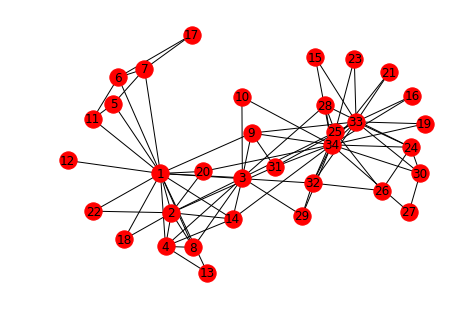

NameError: name 'k_clique_communities' is not defined

In [4]:
print(graph.number_of_nodes());
print(graph.number_of_edges());
print(nx.number_connected_components(graph))
largest_cc = max(nx.connected_components(graph), key=len)
print(largest_cc)
print(nx.average_shortest_path_length(graph))
print(nx.info(graph))

import matplotlib.pyplot as plt

nx.draw(graph, with_labels=True)
plt.show()
graph.degree()
degree_centrality = nx.degree_centrality(graph)
degree_centrality

k_clique = k_clique_communities(graph, 3)

In [5]:
from seaborn import color_palette, set_style, palplot
def map_communities(G, communities):
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map


from seaborn import color_palette, set_style, palplot
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    
    attributes = [G.node[label][attribute] for label in G.nodes()]
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)
    #print(num_values)%%
    palette = color_palette(seaborn_palette, num_values).as_hex()
    color_map = dict(zip(attributes_unique, palette))
    node_colors = [color_map[attribute] for attribute in attributes]
    return node_colors


C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\Surendra\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



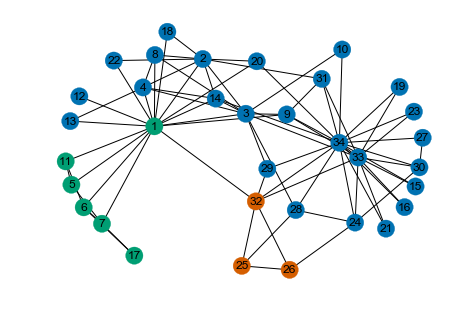

In [47]:
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt
%matplotlib inline
#pytumblr.helpers
#!pip install https://github.com/dianakhuang/pytumblr/archive/diana/python-3-support.zip
#import helpers.
k_clique = k_clique_communities(graph, 3)


k_clique_comm = [list(community) for community in k_clique]
#print(k_clique_comm)

community_map = map_communities(graph, k_clique_comm)
for k,v in community_map.items():
    if(v == None):
        community_map[k] = 0   
#print(community_map)
nx.set_node_attributes(graph, 'community k-clique', community_map)

#print(nx.get_node_attributes(graph, 'community k-clique'))


node_colors1=create_color_map(graph, 'community k-clique')
#print(node_colors1)
#color_map=create_color_map(graph, 'community k-clique')
nx.draw(graph, node_color=node_colors1,with_labels=True)

In [48]:
print(community_map)

{1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 2, 26: 2, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 2, 33: 0, 34: 0}


In [49]:
list1 =[]
i = 0;
for k ,v in community_map.items():
    list1.insert(i,v)
    i+=1
print(list1)

[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0]


In [50]:
def graphToEdgeMatrix(graph):
    edgeMat = [[0 for x in range(len(graph)+1)] for y in range(len(graph)+1)]
    for node in graph:
        tempNeighList = graph.neighbors(node)
        for neighbor in tempNeighList:
            edgeMat[node][neighbor] = 1
        edgeMat[node][node] = 1

    return edgeMat

In [51]:
assumption = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
edgeMat = graphToEdgeMatrix(graph)


In [52]:
from sklearn import*
#K-means
kmeans = cluster.KMeans(n_clusters=2, n_init=200)
results =[]
kmeans.fit(edgeMat)
print(kmeans.labels_)
results.append(kmeans.labels_)

[1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [53]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
nmiResults =[]
arsResults =[]

for x in results:
    nmiResults.append(normalized_mutual_info_score(assumption, x))
    arsResults.append(adjusted_rand_score(assumption, x))

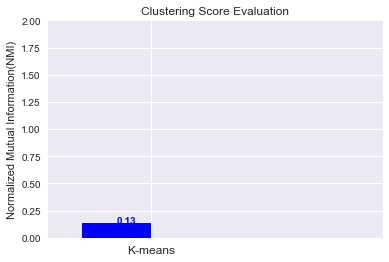

In [54]:
y = [sum(x) for x in zip(nmiResults)]
xlabels = ['K-means', 'Agglomerative', 'Spectral']
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(len(y))
width = 0.35
ax.bar(ind, y, width,color='blue', error_kw=dict(elinewidth=2, ecolor='red'))
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0,2)
ax.set_ylabel('Normalized Mutual Information(NMI)')
ax.set_title('Clustering Score Evaluation')
ax.set_xticks(ind + width / 2)
xtickNames = ax.set_xticklabels(xlabels)
plt.setp(xtickNames, fontsize=12)
for i, v in enumerate(y):
    ax.text( i, v, str(round(v, 2)), color='blue', fontweight='bold')
plt.show()